# 1. Data collection

In [1]:
# from data.get_data import fetch_mt5_data_between_dates
# import MetaTrader5 as mt5
from datetime import datetime, timedelta

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# ## Get data from trainning
# symbol = 'US500'
# end_date = datetime.now()
# start_date = end_date - timedelta(days=365*10)
# timeframe =timeframe = mt5.TIMEFRAME_M15
# data_signal = fetch_mt5_data_between_dates (symbol, timeframe, start_date, end_date)

In [3]:
# ## Get data from trainning
# symbol = "US500"
# end_date = datetime.now()
# start_date = end_date - timedelta(days=365*3)
# timeframe =timeframe = mt5.TIMEFRAME_H1
# df_1h = fetch_mt5_data_between_dates (symbol, timeframe, start_date, end_date)
# df_1h.head()

In [4]:
df_1h = pd.read_csv('SPY_1h.csv')

In [5]:
df_1h['time'] = pd.to_datetime (df_1h['time'])
df_1h = df_1h.set_index('time')

In [6]:
# df_1h.to_csv('SPY_1h.csv')

In [7]:
# ## Get data from trainning
# symbol = "US500"
# end_date = datetime.now()
# start_date = end_date - timedelta(days=365*3)
# timeframe =timeframe = mt5.TIMEFRAME_H4
# df_4h = fetch_mt5_data_between_dates (symbol, timeframe, start_date, end_date)
# df_4h .head()

In [8]:
df_4h = pd.read_csv('SPY_4h.csv')

In [9]:
df_4h['time'] = pd.to_datetime( df_4h['time'])
df_4h = df_4h.set_index('time')

In [10]:
# df_4h.to_csv('SPY_4h.csv')

## Market regime using HMM 

In [11]:
from market_regime.regime import MarketRegime 

In [12]:
regime_detector = MarketRegime(df_4h)

## HMM

In [13]:
from hmmlearn.hmm import GaussianHMM

In [14]:
window_size_rolling = 34

In [15]:
hmm, state_labels = regime_detector._train_HMM (window_size_rolling =34)

Model is not converging.  Current: -6294.787852026079 is not greater than -6294.595244308063. Delta is -0.1926077180160064


        start_price  end_price  price_change
regime                                      
0           6604.46    6612.50          8.04
1           3606.20    3733.48       -145.23
2           3685.36    3582.78       -247.41


In [16]:
df_h4_hmm = regime_detector._regime_HMM  (window_size_rolling, df_4h, hmm, state_labels)
df_h4_hmm .head()

,open,high,low,close,tick_volume,spread,real_volume,volume,return,price_std,vol_change,regime,regime_labels
time,,,,,,,,,,,,,
2022-09-26 04:00:00,3675.44,3704.43,3659.29,3685.36,9590,85,0,9590,0.002658,76.131935,0.072227,2,Bear - decrease
2022-09-26 08:00:00,3685.78,3697.07,3658.34,3672.33,11484,73,0,11484,-0.003536,78.788130,0.197497,2,Bear - decrease
2022-09-26 12:00:00,3672.53,3716.25,3663.91,3682.80,15863,77,0,15863,0.002851,80.402496,0.381313,2,Bear - decrease
2022-09-26 16:00:00,3682.99,3683.33,3644.36,3660.05,14445,78,0,14445,-0.006177,82.932582,-0.089390,2,Bear - decrease
2022-09-26 20:00:00,3657.35,3668.49,3656.78,3666.09,1707,75,0,1707,0.001650,85.175515,-0.881828,2,Bear - decrease


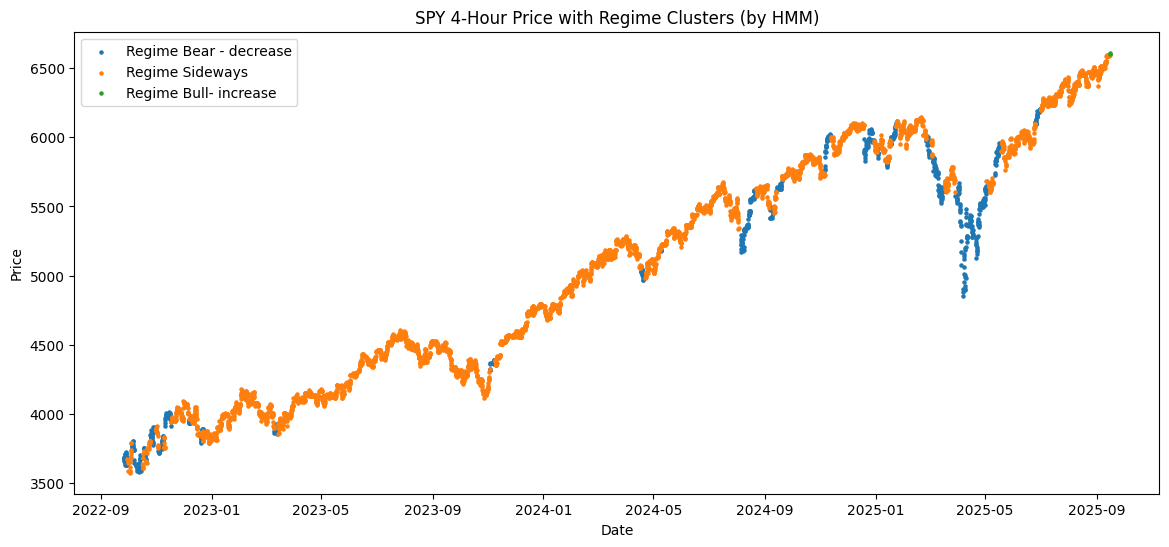

In [17]:
plt.figure(figsize=(14, 6))
# plt.plot(df_hmm['time'], df_hmm['close'], color='gray', label='Close Price')
for regime in df_h4_hmm ['regime_labels'].unique():
    mask = df_h4_hmm ['regime_labels'] == regime
    plt.scatter(df_h4_hmm .index[mask],df_h4_hmm ['close'][mask],
                label=f"Regime {regime}", s=5)
plt.legend()
plt.title("SPY 4-Hour Price with Regime Clusters (by HMM)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

### Slope clustering


In [18]:
df_4h

,open,high,low,close,tick_volume,spread,real_volume,volume
time,,,,,,,,
2022-09-16 16:00:00,3859.96,3878.93,3837.55,3878.28,10285,79,0,10285
2022-09-18 20:00:00,3872.15,3882.63,3871.35,3878.62,1579,90,0,1579
2022-09-19 00:00:00,3878.63,3884.13,3859.60,3866.91,4554,84,0,4554
2022-09-19 04:00:00,3866.97,3869.91,3845.95,3846.40,5436,87,0,5436
2022-09-19 08:00:00,3846.68,3854.45,3831.29,3836.60,7000,74,0,7000
...,...,...,...,...,...,...,...,...
2025-09-14 20:00:00,6591.99,6594.38,6587.28,6590.14,1810,35,0,1810
2025-09-15 00:00:00,6590.13,6595.38,6586.92,6593.87,3323,35,0,3323
2025-09-15 04:00:00,6593.88,6603.50,6593.87,6600.75,3843,29,0,3843


In [19]:
window_size = 4
window_size_rolling = 34
slope_cluster, state_labels = regime_detector._train_SlopeCluster(window_size,
                                            window_size_rolling
                                            )
state_labels 

        start_idx  end_idx  start_price  end_price  price_change
regime                                                          
0               0       15      3677.38    3733.80       -114.81
2              16       31      3739.90    3619.92       -183.22
1              32       55      3589.36    3682.42       -458.39


{np.int64(0): 'Bull- increase',
 np.int64(2): 'Sideways',
 np.int64(1): 'Bear - decrease'}

In [20]:
df_4h_slope = regime_detector._regime_SlopeCluster(
                             window_size,
                             window_size_rolling,
                             df_4h,
                             slope_cluster, 
                             state_labels )

In [21]:
df_4h

,open,high,low,close,tick_volume,spread,real_volume,volume
time,,,,,,,,
2022-09-16 16:00:00,3859.96,3878.93,3837.55,3878.28,10285,79,0,10285
2022-09-18 20:00:00,3872.15,3882.63,3871.35,3878.62,1579,90,0,1579
2022-09-19 00:00:00,3878.63,3884.13,3859.60,3866.91,4554,84,0,4554
2022-09-19 04:00:00,3866.97,3869.91,3845.95,3846.40,5436,87,0,5436
2022-09-19 08:00:00,3846.68,3854.45,3831.29,3836.60,7000,74,0,7000
...,...,...,...,...,...,...,...,...
2025-09-14 20:00:00,6591.99,6594.38,6587.28,6590.14,1810,35,0,1810
2025-09-15 00:00:00,6590.13,6595.38,6586.92,6593.87,3323,35,0,3323
2025-09-15 04:00:00,6593.88,6603.50,6593.87,6600.75,3843,29,0,3843


In [22]:
df_4h_slope .head()

,time,open,high,low,close,tick_volume,spread,real_volume,volume,ma,slope,vol_change,regime,regime_labels
0,2022-09-26 20:00:00,3657.35,3668.49,3656.78,3666.09,1707,75,0,1707,3788.097353,-5.752441,-0.881828,1.0,Bear - decrease
1,2022-09-27 00:00:00,3666.20,3686.50,3665.57,3681.52,7200,83,0,7200,3783.536176,-5.314882,3.217926,1.0,Bear - decrease
2,2022-09-27 04:00:00,3681.36,3711.52,3677.55,3706.52,6997,83,0,6997,3778.958235,-4.788824,-0.028194,1.0,Bear - decrease
3,2022-09-27 08:00:00,3706.40,3710.79,3681.82,3706.40,9334,74,0,9334,3773.186471,-4.931059,0.334000,1.0,Bear - decrease
4,2022-09-27 12:00:00,3706.33,3718.53,3654.11,3654.61,15766,77,0,15766,3765.489118,-5.991294,0.689094,1.0,Bear - decrease


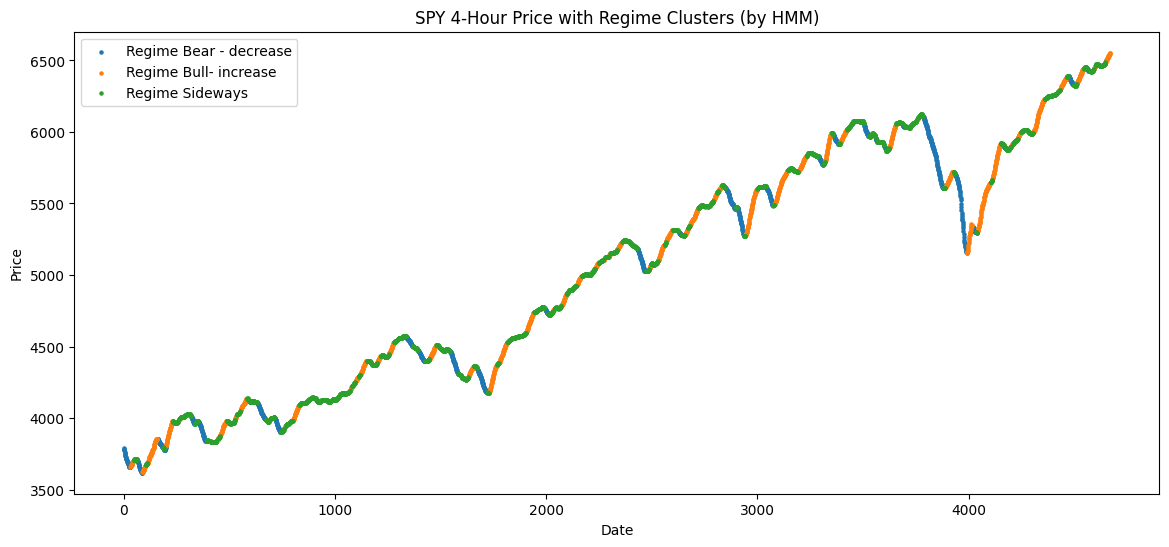

In [23]:
plt.figure(figsize=(14, 6))
# plt.plot(df_hmm['time'], df_hmm['close'], color='gray', label='Close Price')
for regime in sorted(df_4h_slope ['regime_labels'].unique()):
    mask = df_4h_slope['regime_labels'] == regime
    plt.scatter(df_4h_slope .index[mask],df_4h_slope['ma'][mask],
                label=f"Regime {regime}", s=5)
plt.legend()
plt.title("SPY 4-Hour Price with Regime Clusters (by HMM)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

### Coiled_spring

In [24]:
from swing_signal.ma_convergence import CoiledSpringEMAConvergenceStrategy, Dip_Tip_MA_Convergence_H4_to_H1

In [25]:
coile_spring = CoiledSpringEMAConvergenceStrategy()

In [26]:
df_1h, df_4h = coile_spring.detect_convergence(df_1h, df_4h) 

In [27]:
signals = coile_spring.generate_signals (df_1h,df_4h)

In [28]:
import pandas as pd
signals_df = pd.DataFrame(signals, columns=["time", "signal", "signal_price"])

df_1h_csp= df_1h.merge(signals_df, on="time", how="left")

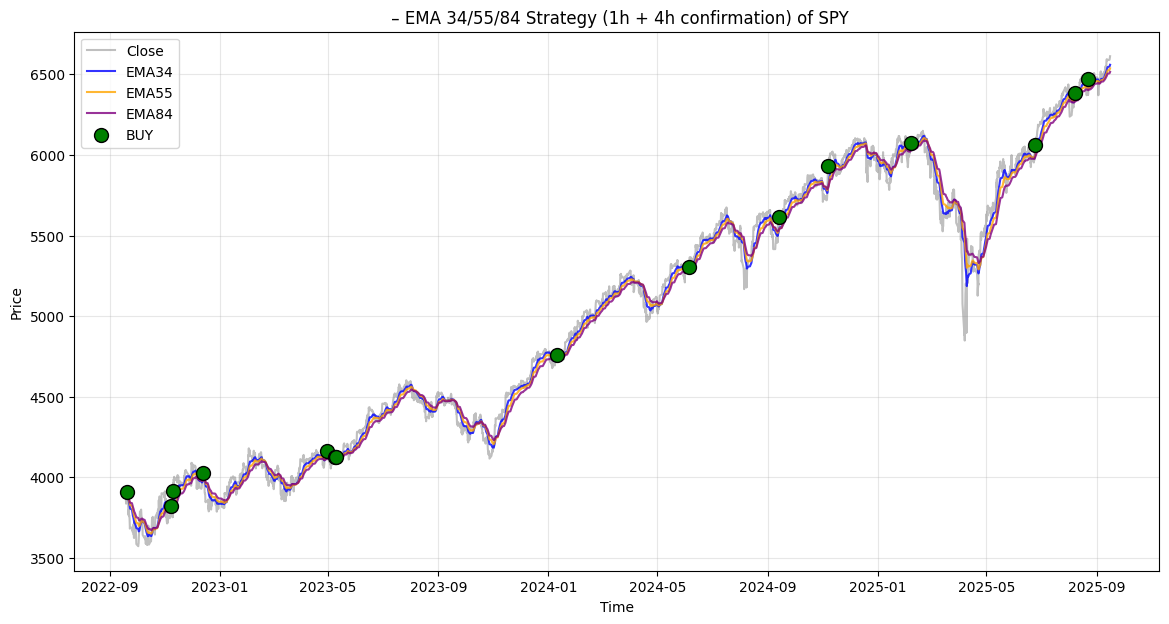

In [29]:
# --------- VẼ BIỂU ĐỒ ---------
plt.figure(figsize=(14, 7))
plt.plot(df_1h.index, df_4h['close'], label='Close', color='gray', alpha=0.5)
plt.plot(df_1h.index, df_4h['EMA34'], label='EMA34', color='blue', alpha=0.8)
plt.plot(df_1h.index, df_4h['EMA55'], label='EMA55', color='orange', alpha=0.8)
plt.plot(df_1h.index, df_4h['EMA84'], label='EMA84', color='purple', alpha=0.8)

# Vẽ tín hiệu BUY/SELL
for t, sig, price in signals:
    color = 'green' if sig == 'BUY' else 'red'
    plt.scatter(t, price, color=color, s=100, label=sig if t == signals[0][0] else "",
                edgecolors='black', zorder=5)

plt.title(f" – EMA 34/55/84 Strategy (1h + 4h confirmation) of SPY")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


### Dip Tip

In [30]:
# Khởi tạo strategy
dip = Dip_Tip_MA_Convergence_H4_to_H1()

# Sinh tín hiệu H1 dựa trên hội tụ H4
df_dip = dip.generate_signals(df_1h, df_4h)


In [31]:
df_dip 

,open,high,low,close,tick_volume,spread,real_volume,volume,EMA34,EMA55,EMA84,converged,ema_34,ema_55,ema_84,ema_mid,max_ema_gap,ema_converged,signal
time,,,,,,,,,,,,,,,,,,,
2022-09-16 16:00:00,3859.96,3878.93,3837.55,3878.28,10285,79,0,10285,3878.280000,3878.280000,3878.280000,True,3878.280000,3878.280000,3878.280000,3878.280000,0.000000,True,True
2022-09-18 20:00:00,3872.15,3882.63,3871.35,3878.62,1579,90,0,1579,3878.299429,3878.292143,3878.288000,True,3878.299429,3878.292143,3878.288000,3878.293190,0.011429,True,True
2022-09-19 00:00:00,3878.63,3884.13,3859.60,3866.91,4554,84,0,4554,3877.648604,3877.885638,3878.020282,True,3877.648604,3877.885638,3878.020282,3877.851508,0.371678,True,True
2022-09-19 04:00:00,3866.97,3869.91,3845.95,3846.40,5436,87,0,5436,3875.862970,3876.761151,3877.276276,True,3875.862970,3876.761151,3877.276276,3876.633465,1.413306,True,False
2022-09-19 08:00:00,3846.68,3854.45,3831.29,3836.60,7000,74,0,7000,3873.619371,3875.326824,3876.319187,True,3873.619371,3875.326824,3876.319187,3875.088461,2.699816,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-14 20:00:00,6591.99,6594.38,6587.28,6590.14,1810,35,0,1810,6547.892997,6527.006689,6506.372466,True,6547.892997,6527.006689,6506.372466,6527.090717,41.520531,False,False
2025-09-15 00:00:00,6590.13,6595.38,6586.92,6593.87,3323,35,0,3323,6550.520254,6529.394664,6508.431232,True,6550.520254,6529.394664,6508.431232,6529.448717,42.089023,False,False
2025-09-15 04:00:00,6593.88,6603.50,6593.87,6600.75,3843,29,0,3843,6553.390525,6531.943069,6510.603438,True,6553.390525,6531.943069,6510.603438,6531.979011,42.787088,False,False


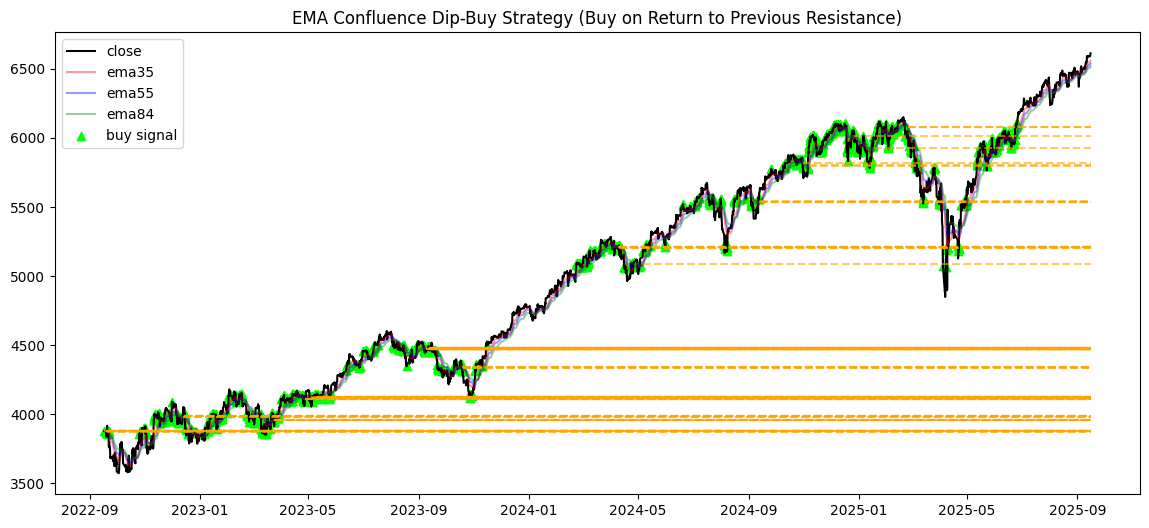

In [32]:

# ---------- Vẽ ----------
plt.figure(figsize=(14,6))
plt.plot(df_dip.index, df_dip["close"], label="close", color="black")
plt.plot(df_dip.index, df_dip["ema_34"], color="red", alpha=0.4, label="ema35")
plt.plot(df_dip.index, df_dip["ema_55"], color="blue", alpha=0.4, label="ema55")
plt.plot(df_dip.index, df_dip["ema_84"], color="green", alpha=0.4, label="ema84")

# Vẽ các đường kháng cự từ hội tụ
for t, row in df_dip.loc[df_dip["ema_converged"], ["ema_mid"]].iterrows():
    plt.hlines(y=row["ema_mid"], xmin=t, xmax=df_dip.index[-1], colors="orange", linestyles="dashed", alpha=0.6)

# Buy signal
plt.scatter(df_dip.index[df_dip["signal"]], df_dip["close"][df_dip["signal"]],
            marker="^", color="lime", label="buy signal")

plt.legend()
plt.title("EMA Confluence Dip-Buy Strategy (Buy on Return to Previous Resistance)")
plt.show()

## Backtest

#### HMM + coiled spring

In [33]:
from backtest.backtest import Backtester

Cum return: 1.2066340635955612
Sharpe Ratio: 1.758287502206113


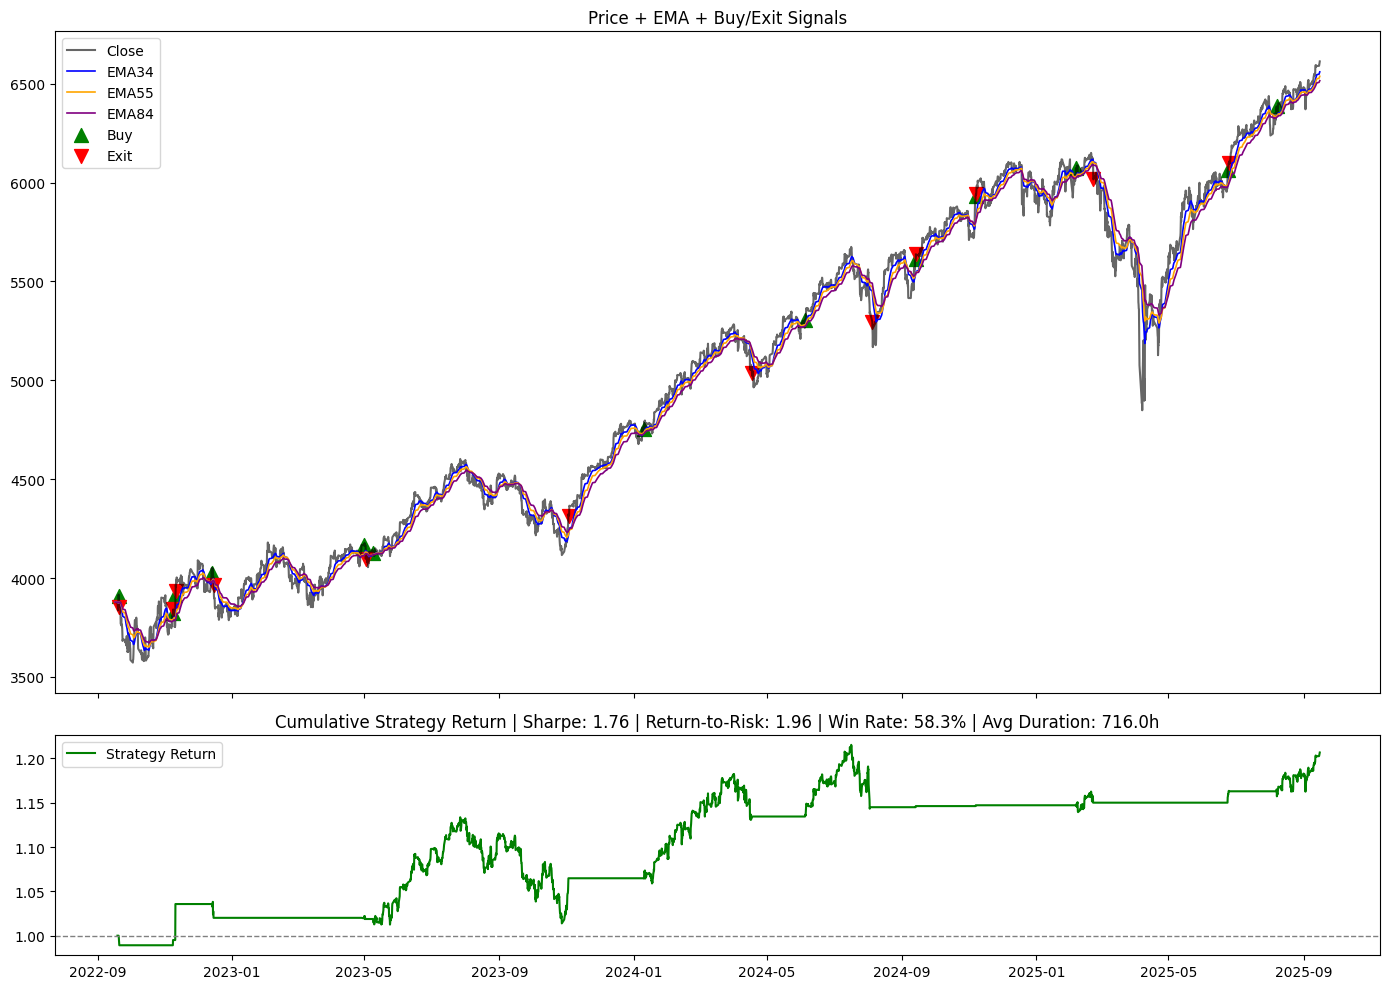

In [34]:
bt = Backtester(df_1h_csp, df_h4_hmm, stoploss=50)
bt.run_backtest()
print("Cum return:", bt.total_return())
print("Sharpe Ratio:", bt.sharpe_ratio())
bt.plot_results()


### slope cluster + coiled spring

In [35]:
df_1h_csp.dtypes

time            datetime64[ns]
open                   float64
high                   float64
low                    float64
close                  float64
tick_volume              int64
spread                   int64
real_volume              int64
volume                   int64
EMA34                  float64
EMA55                  float64
EMA84                  float64
converged                 bool
signal                  object
signal_price           float64
dtype: object

In [36]:
df_h4_hmm.dtypes

open             float64
high             float64
low              float64
close            float64
tick_volume        int64
spread             int64
real_volume        int64
volume             int64
return           float64
price_std        float64
vol_change       float64
regime             int64
regime_labels     object
dtype: object

In [37]:
df_4h_slope = df_4h_slope.set_index('time')

Cum return: 1.3193607778129222
Sharpe Ratio: 3.0937361279571403


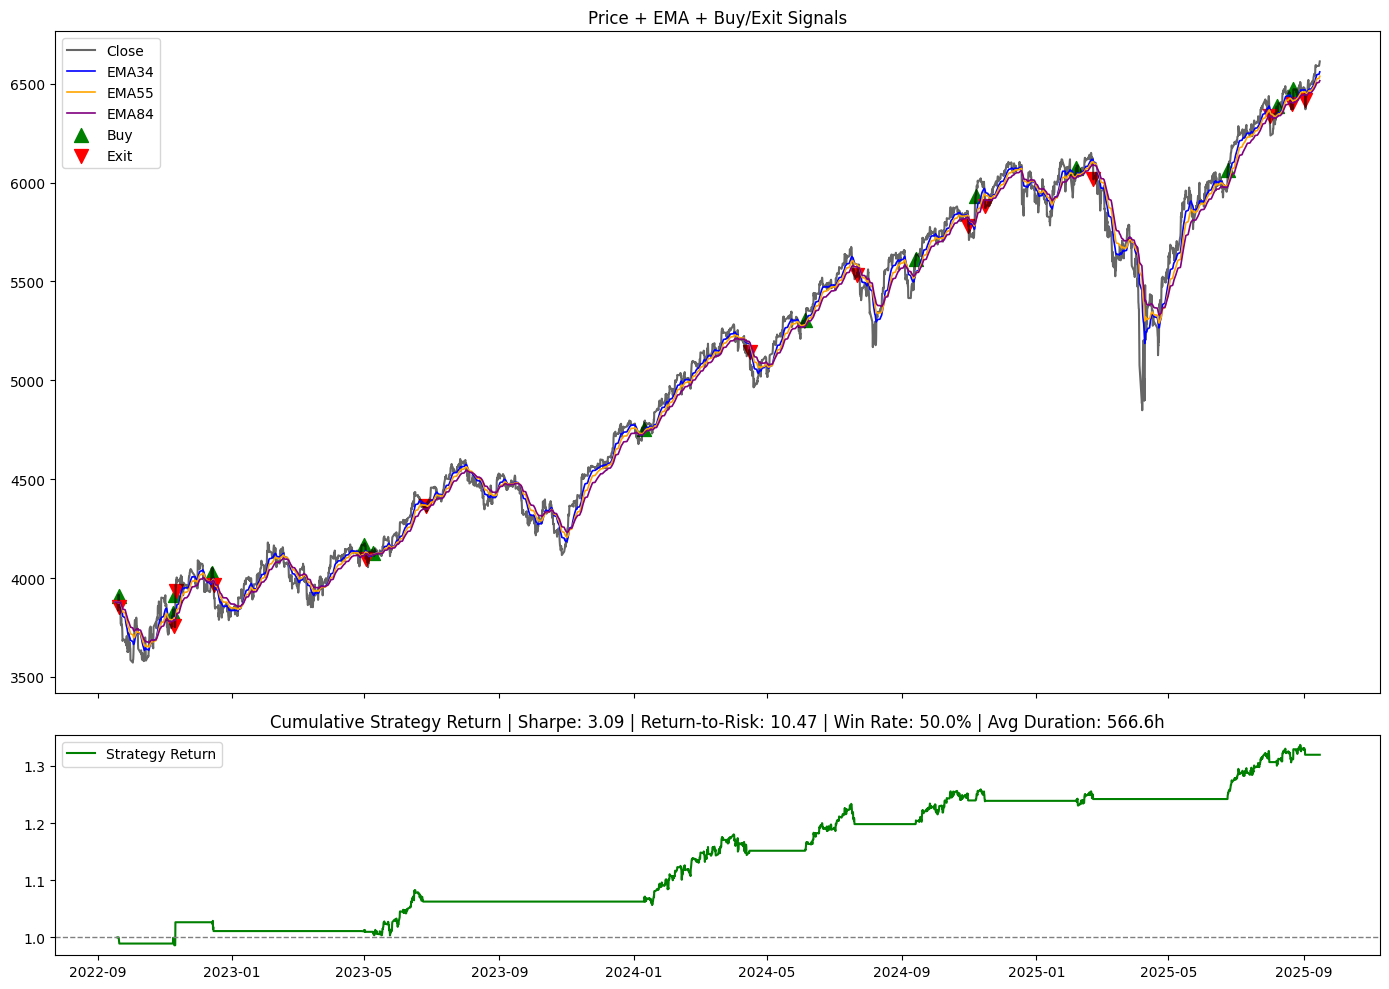

In [38]:
bt = Backtester(df_1h_csp, df_4h_slope, stoploss=50)
bt.run_backtest()
print("Cum return:", bt.total_return())
print("Sharpe Ratio:", bt.sharpe_ratio())
bt.plot_results()


## dip tip + hmm

In [39]:
df_1h_csp

,time,open,high,low,close,tick_volume,spread,real_volume,volume,EMA34,EMA55,EMA84,converged,signal,signal_price
0,2022-09-16 16:00:00,3859.96,3878.93,3837.55,3878.28,10285,79,0,10285,3878.280000,3878.280000,3878.280000,True,NaN,NaN
1,2022-09-18 20:00:00,3872.15,3882.63,3871.35,3878.62,1579,90,0,1579,3878.299429,3878.292143,3878.288000,True,NaN,NaN
2,2022-09-19 00:00:00,3878.63,3884.13,3859.60,3866.91,4554,84,0,4554,3877.648604,3877.885638,3878.020282,True,NaN,NaN
3,2022-09-19 04:00:00,3866.97,3869.91,3845.95,3846.40,5436,87,0,5436,3875.862970,3876.761151,3877.276276,True,NaN,NaN
4,2022-09-19 08:00:00,3846.68,3854.45,3831.29,3836.60,7000,74,0,7000,3873.619371,3875.326824,3876.319187,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4702,2025-09-14 20:00:00,6591.99,6594.38,6587.28,6590.14,1810,35,0,1810,6547.892997,6527.006689,6506.372466,True,NaN,NaN
4703,2025-09-15 00:00:00,6590.13,6595.38,6586.92,6593.87,3323,35,0,3323,6550.520254,6529.394664,6508.431232,True,NaN,NaN
4704,2025-09-15 04:00:00,6593.88,6603.50,6593.87,6600.75,3843,29,0,3843,6553.390525,6531.943069,6510.603438,True,NaN,NaN
4705,2025-09-15 08:00:00,6600.85,6604.92,6588.32,6604.46,10502,29,0,10502,6556.308781,6534.532959,6512.811828,True,NaN,NaN


In [40]:
df_dip['signal'] = df_dip['signal'].apply(lambda x: 'BUY' if x == True else x)
df_dip = df_dip.reset_index()

In [41]:
df_h4_hmm

,open,high,low,close,tick_volume,spread,real_volume,volume,return,price_std,vol_change,regime,regime_labels
time,,,,,,,,,,,,,
2022-09-26 04:00:00,3675.44,3704.43,3659.29,3685.36,9590,85,0,9590,0.002658,76.131935,0.072227,2,Bear - decrease
2022-09-26 08:00:00,3685.78,3697.07,3658.34,3672.33,11484,73,0,11484,-0.003536,78.788130,0.197497,2,Bear - decrease
2022-09-26 12:00:00,3672.53,3716.25,3663.91,3682.80,15863,77,0,15863,0.002851,80.402496,0.381313,2,Bear - decrease
2022-09-26 16:00:00,3682.99,3683.33,3644.36,3660.05,14445,78,0,14445,-0.006177,82.932582,-0.089390,2,Bear - decrease
2022-09-26 20:00:00,3657.35,3668.49,3656.78,3666.09,1707,75,0,1707,0.001650,85.175515,-0.881828,2,Bear - decrease
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-14 20:00:00,6591.99,6594.38,6587.28,6590.14,1810,35,0,1810,0.000199,36.938469,-0.502474,1,Sideways
2025-09-15 00:00:00,6590.13,6595.38,6586.92,6593.87,3323,35,0,3323,0.000566,36.772319,0.835912,1,Sideways
2025-09-15 04:00:00,6593.88,6603.50,6593.87,6600.75,3843,29,0,3843,0.001043,36.448918,0.156485,1,Sideways


Cum return: 1.733561064820839
Sharpe Ratio: 3.3033861036717056


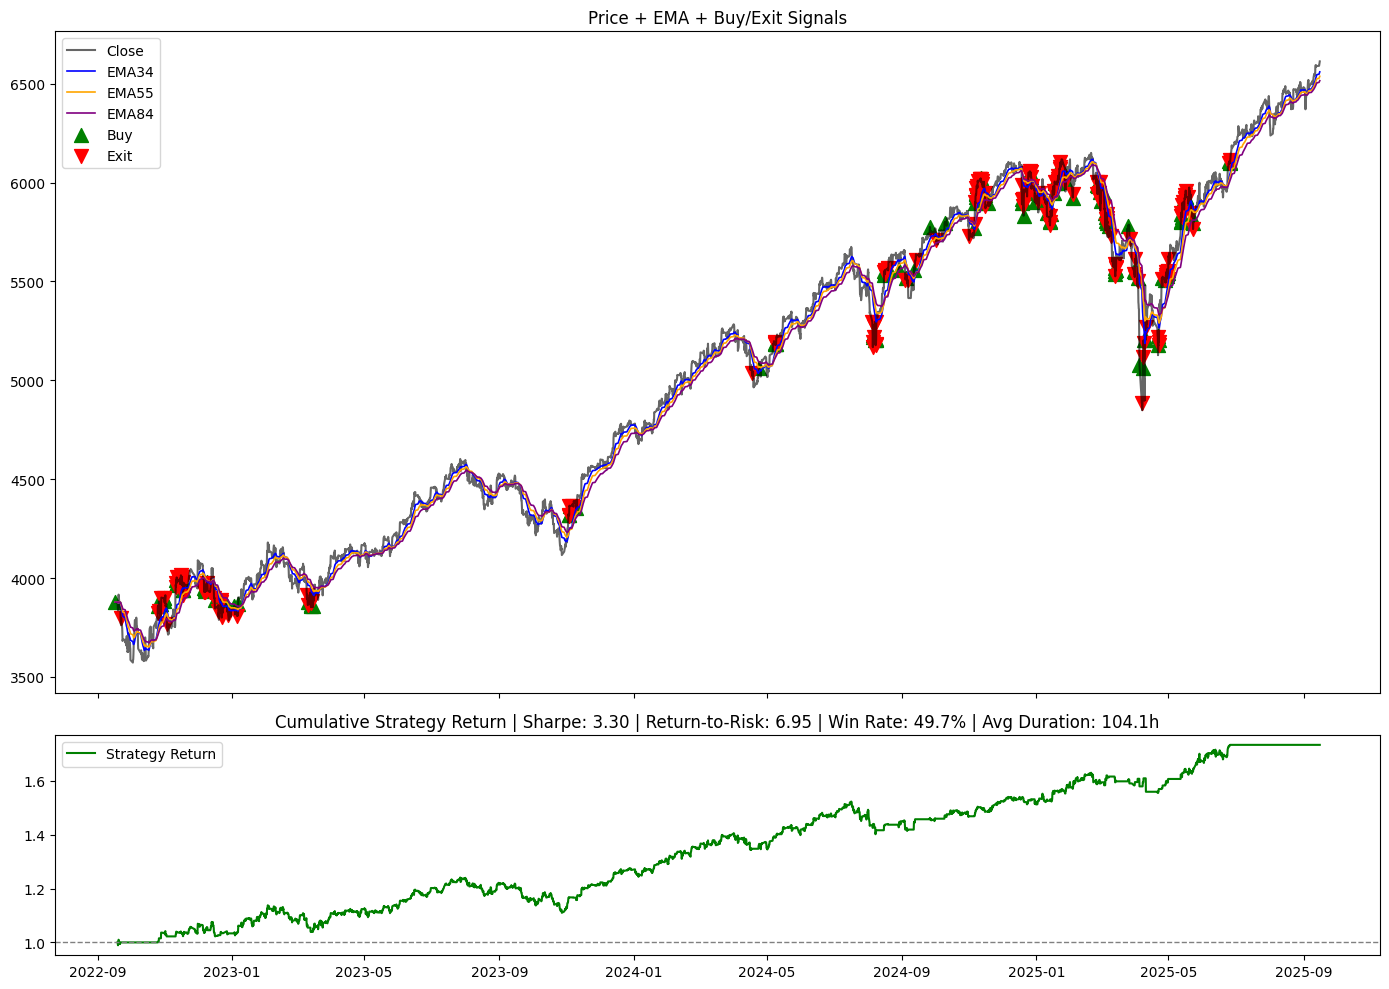

In [42]:
bt = Backtester(df_dip, df_h4_hmm, stoploss=50)
bt.run_backtest()
print("Cum return:", bt.total_return())
print("Sharpe Ratio:", bt.sharpe_ratio())
bt.plot_results()


##### Slope cluster + dip 

Cum return: 1.6398739652605672
Sharpe Ratio: 3.1140241880604065


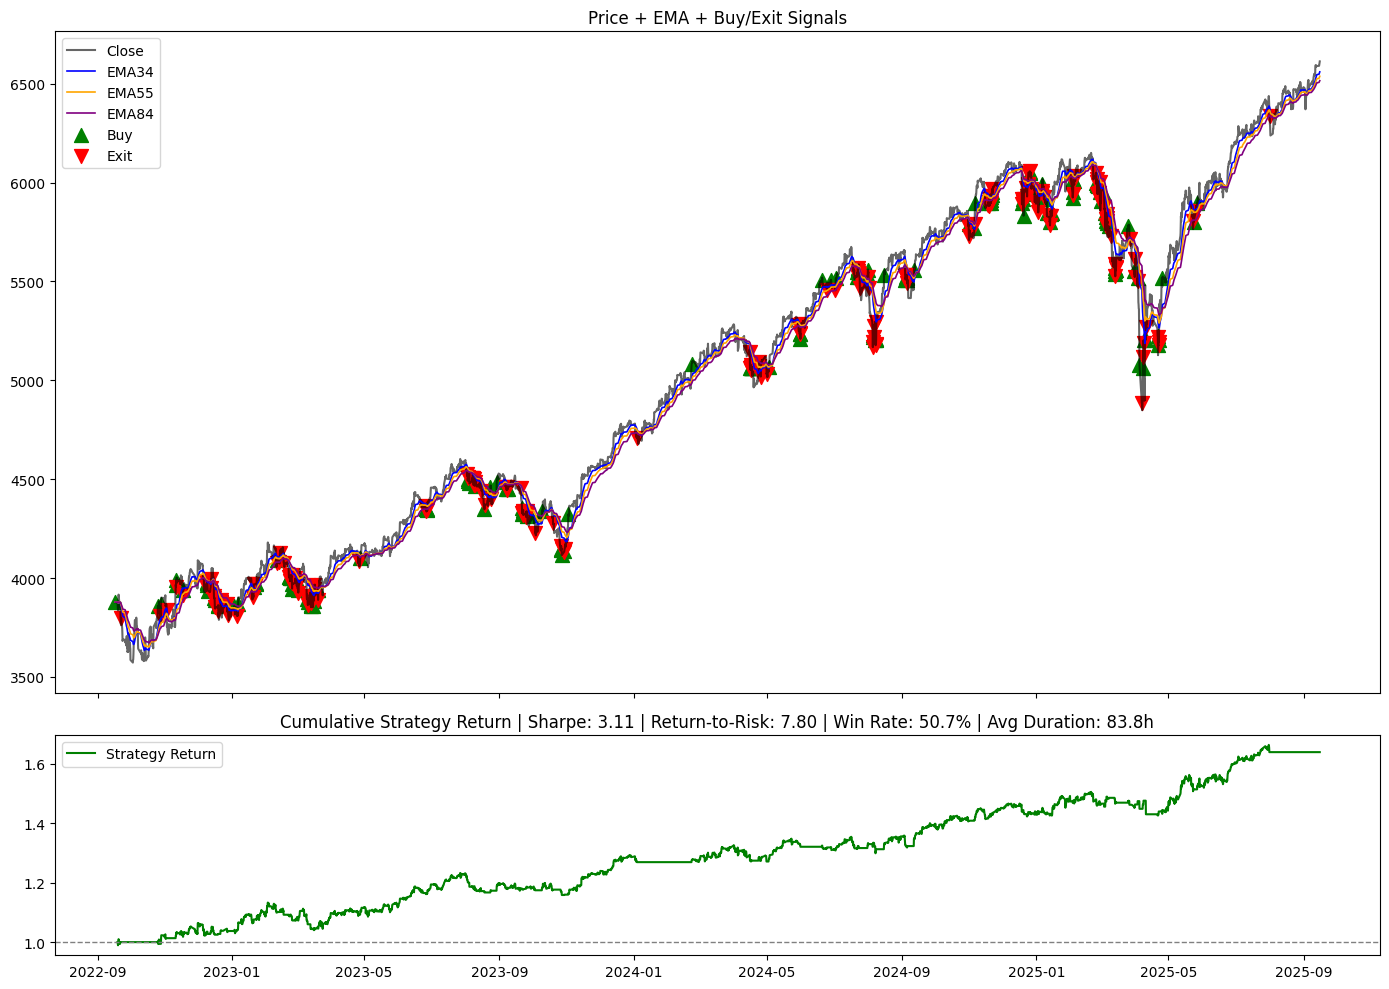

In [43]:
bt = Backtester(df_dip, df_4h_slope, stoploss=50)
bt.run_backtest()
print("Cum return:", bt.total_return())
print("Sharpe Ratio:", bt.sharpe_ratio())
bt.plot_results()


## Reinforcement_Learning

### Coil Spring

In [44]:
from reinforcement_learning.training_RL import *
from backtest.backtest import *

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


In [45]:
data = prepare_rl_data(df_1h_csp, window=32)

X_train, X_test = data["X_train"], data["X_test"]
nr_train, nr_test = data["nr_train"], data["nr_test"]
sig_train, sig_test = data["sig_train"], data["sig_test"]
t_train, t_test = data["t_train"], data["t_test"]
p_train, p_test = data["p_train"], data["p_test"]

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (3739, 32, 9)
X_test shape: (935, 32, 9)


In [46]:
np.savez_compressed("train_coil_spring.npz",
                    X=X_train,
                    next_return=nr_train,
                    y_signal=sig_train,
                    times=t_train,
                    prices=p_train)

np.savez_compressed("test_coil_spring.npz",
                    X=X_test,
                    next_return=nr_test,
                    y_signal=sig_test,
                    times=t_test,
                    prices=p_test)


In [47]:
model, env, meta = train_agent(
    train_npz_path="train_coil_spring.npz",
    output_dir="results",
    total_timesteps=50_000,   # lower for quick test in notebook
    transaction_cost=0.0005,
    include_signal_in_state=True,
    seed=42
)


Using cpu device


c:\Users\ASUS\anaconda3\envs\capstone_env\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\capstone_env\lib\site-packages\stable_baselines3\common\policies.py:486: UserWarning: As shared layers in the mlp_extractor are removed since SB3 v1.8.0, you should now pass directly a dictionary and not a list (net_arch=dict(pi=..., vf=...) instead of net_arch=[dict(pi=..., vf=...)])
  warnings.warn(


Starting training PPO for 50000 timesteps...
-----------------------------
| time/              |      |
|    fps             | 923  |
|    iterations      | 1    |
|    time_elapsed    | 2    |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 588          |
|    iterations           | 2            |
|    time_elapsed         | 6            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0061183567 |
|    clip_fraction        | 0.0496       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.09        |
|    explained_variance   | -8.9         |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0426      |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.00414     |
|    value_loss           | 0.0222       |
--------------

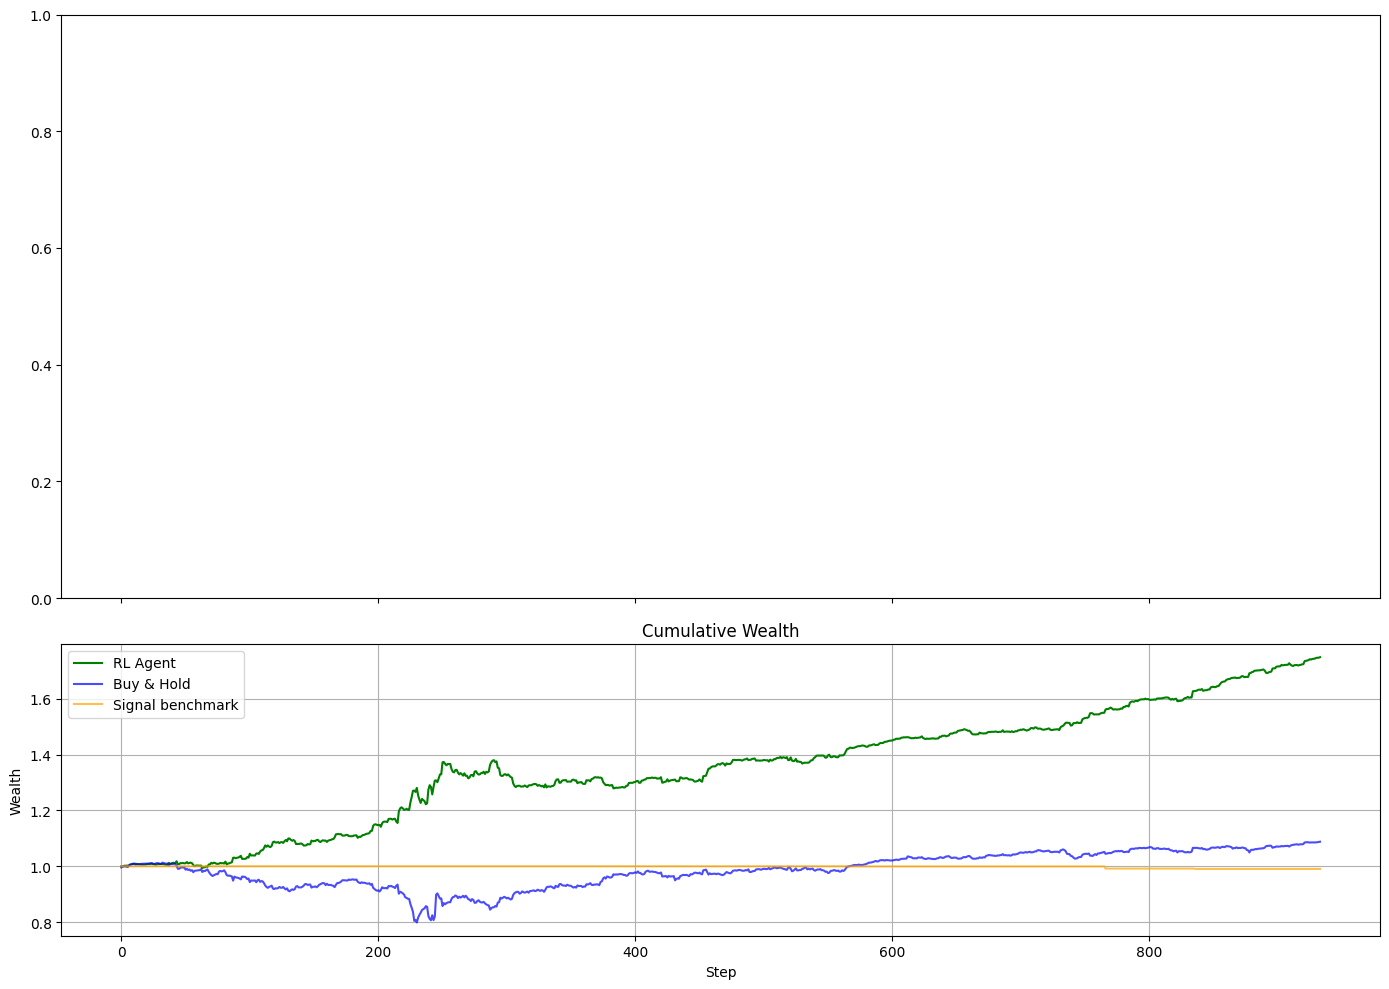

Agent stats: {'final_return': 0.7491324756297888, 'final_wealth': 1.7491324756297888, 'win_rate': 0.607066381156317, 'sharpe_ratio': 0.13666684918511599, 'return_to_risk': np.float64(171.02661668218587), 'avg_trade_duration': 4.154761904761905}
Results saved at: results\backtest_20250917_205213.npz
Plot saved at: results\backtest_plot_20250917_205213.png


In [48]:
backtester = BacktesterRL(model, env, transaction_cost=0.0005, output_dir="results")
res = backtester.run(X_test, nr_test,sig_test, t_test, p_test)

print("Agent stats:", res["agent"])
print("Results saved at:", res["saved_npz"])
print("Plot saved at:", res["plot"])


## Dip Tip

In [49]:
data = prepare_rl_data(df_dip, window=32)

X_train, X_test = data["X_train"], data["X_test"]
nr_train, nr_test = data["nr_train"], data["nr_test"]
sig_train, sig_test = data["sig_train"], data["sig_test"]
t_train, t_test = data["t_train"], data["t_test"]
p_train, p_test = data["p_train"], data["p_test"]

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (3739, 32, 9)
X_test shape: (935, 32, 9)


In [50]:
np.savez_compressed("train_dip.npz",
                    X=X_train,
                    next_return=nr_train,
                    y_signal=sig_train,
                    times=t_train,
                    prices=p_train)

np.savez_compressed("test_dip.npz",
                    X=X_test,
                    next_return=nr_test,
                    y_signal=sig_test,
                    times=t_test,
                    prices=p_test)


In [51]:
model, env, meta = train_agent(
    train_npz_path="train_dip.npz",
    output_dir="results",
    total_timesteps=50_000,   # lower for quick test in notebook
    transaction_cost=0.0005,
    include_signal_in_state=True,
    seed=42
)


Using cpu device
Starting training PPO for 50000 timesteps...


c:\Users\ASUS\anaconda3\envs\capstone_env\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
c:\Users\ASUS\anaconda3\envs\capstone_env\lib\site-packages\stable_baselines3\common\policies.py:486: UserWarning: As shared layers in the mlp_extractor are removed since SB3 v1.8.0, you should now pass directly a dictionary and not a list (net_arch=dict(pi=..., vf=...) instead of net_arch=[dict(pi=..., vf=...)])
  warnings.warn(


-----------------------------
| time/              |      |
|    fps             | 952  |
|    iterations      | 1    |
|    time_elapsed    | 2    |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 582          |
|    iterations           | 2            |
|    time_elapsed         | 7            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0039396617 |
|    clip_fraction        | 0.0507       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.09        |
|    explained_variance   | -8.9         |
|    learning_rate        | 0.0003       |
|    loss                 | -0.0239      |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.00295     |
|    value_loss           | 0.0166       |
------------------------------------------
----------------

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

class BacktesterRL:
    def __init__(self, model, env, transaction_cost=0.0005, output_dir="results"):
        self.model = model
        self.env = env
        self.tc = transaction_cost
        self.output_dir = output_dir
        os.makedirs(self.output_dir, exist_ok=True)

    def run(self, X_test, next_return_test, y_signal_test=None, times_test=None, prices_test=None):
        # Build test environment
        test_env = self.env.__class__(
            X_seq=X_test,
            next_returns=next_return_test,
            y_signal=y_signal_test,
            prices=prices_test,
            transaction_cost=self.tc,
            include_signal_in_state=self.env.include_signal_in_state
        )

        # Run policy
        obs, _ = test_env.reset()
        actions, rewards, positions = [], [], []
        while True:
            action, _ = self.model.predict(obs, deterministic=True)
            obs, r, done, truncated, info = test_env.step(action)
            actions.append(int(action))
            rewards.append(float(r))
            positions.append(info.get("position", 0))
            if done:
                break

        # Convert to arrays
        actions = np.array(actions)
        rewards = np.array(rewards)
        positions = np.array(positions)
        cum_log_returns = np.cumsum(rewards)
        wealth = np.exp(cum_log_returns)

        # Compute benchmarks
        wealth_bh = self._buy_and_hold(next_return_test, len(rewards))
        wealth_signal = self._signal_benchmark(next_return_test, y_signal_test, len(rewards)) if y_signal_test is not None else None

        # Compute metrics
        stats = self._compute_stats(rewards, positions, cum_log_returns)

        # Save results
        ts = datetime.now().strftime("%Y%m%d_%H%M%S")
        result_path = os.path.join(self.output_dir, f"backtest_{ts}.npz")
        np.savez_compressed(
            result_path,
            actions=actions,
            rewards=rewards,
            positions=positions,
            cum_log_returns=cum_log_returns,
            wealth=wealth,
            wealth_bh=wealth_bh,
            wealth_signal=wealth_signal,
            times=times_test[:len(rewards)] if times_test is not None else None,
            prices=prices_test[:len(rewards)] if prices_test is not None else None
        )

        # Plot
        self._plot(
            wealth, 
            wealth_bh, 
            wealth_signal, 
            ts,
            times=times_test[:len(rewards)] if times_test is not None else None,
            prices=prices_test[:len(rewards)] if prices_test is not None else None,
            actions=actions
        )

        return {
            "agent": stats,
            "plot": os.path.join(self.output_dir, f"backtest_plot_{ts}.png"),
            "saved_npz": result_path
        }

    # --- Benchmarks ---
    def _buy_and_hold(self, next_return_test, length):
        br = next_return_test[:length].astype(float)
        br[0] -= self.tc  # initial cost
        return np.exp(np.cumsum(br))

    def _signal_benchmark(self, next_return_test, y_signal_test, length):
        sig = y_signal_test[:length].astype(int)
        positions_sig = np.where(sig == 1, 1.0, 0.0)
        prev_pos = 0.0
        rew_sig = []
        for i, pos in enumerate(positions_sig):
            r_sig = pos * next_return_test[i] - self.tc * abs(pos - prev_pos)
            rew_sig.append(r_sig)
            prev_pos = pos
        return np.exp(np.cumsum(np.array(rew_sig)))

    # --- Stats ---
    def _compute_stats(self, rewards, positions, cum_log_returns):
        final_wealth = float(np.exp(cum_log_returns[-1]))
        final_return = final_wealth - 1.0
        win_rate = float(np.mean(rewards > 0))
        sharpe = float(np.mean(rewards) / (np.std(rewards) + 1e-8))
        return_to_risk = final_return / (np.std(rewards) + 1e-8)

        # Average trade duration
        trades, cur_len, prev_pos = [], 0, 0
        for pos in positions:
            if pos != 0:
                cur_len += 1
                if prev_pos == 0:
                    cur_len = 1
            else:
                if prev_pos != 0:
                    trades.append(cur_len)
                    cur_len = 0
            prev_pos = pos
        if cur_len > 0:
            trades.append(cur_len)
        avg_trade_duration = float(np.mean(trades)) if trades else 0.0

        return {
            "final_return": final_return,
            "final_wealth": final_wealth,
            "win_rate": win_rate,
            "sharpe_ratio": sharpe,
            "return_to_risk": return_to_risk,
            "avg_trade_duration": avg_trade_duration
        }

    # --- Plotting ---
    def _plot(self, wealth, wealth_bh, wealth_signal, ts, times=None, prices=None, actions=None):
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True,
                                       gridspec_kw={'height_ratios':[2,1]})

        # Use step indices if times not provided
        if times is None:
            times = np.arange(len(wealth))

        # 1️⃣ Price chart + actions
        if prices is not None and actions is not None:
            ax1.plot(times, prices, color="black", alpha=0.6, label="Price")

            # Action masks: adjust according to your env (0=flat/exit, 1=long)
            buy_mask = actions == 1
            sell_mask = actions == 0
            ax1.scatter(np.array(times)[buy_mask], np.array(prices)[buy_mask],
                        marker="^", color="green", s=80, label="Buy/Long")
            ax1.scatter(np.array(times)[sell_mask], np.array(prices)[sell_mask],
                        marker="v", color="red", s=80, label="Exit/Flat")

            ax1.set_title("Price + Agent Signals")
            ax1.legend()
            ax1.grid(True)

        # 2️⃣ Wealth chart
        ax2.plot(times, wealth, label="RL Agent", color="green")
        ax2.plot(times, wealth_bh, label="Buy & Hold", color="blue", alpha=0.7)
        if wealth_signal is not None:
            ax2.plot(times, wealth_signal, label="Signal benchmark", color="orange", alpha=0.7)
        ax2.set_title("Cumulative Wealth")
        ax2.set_xlabel("Step")
        ax2.set_ylabel("Wealth")
        ax2.legend()
        ax2.grid(True)

        plt.tight_layout()
        plt.show()

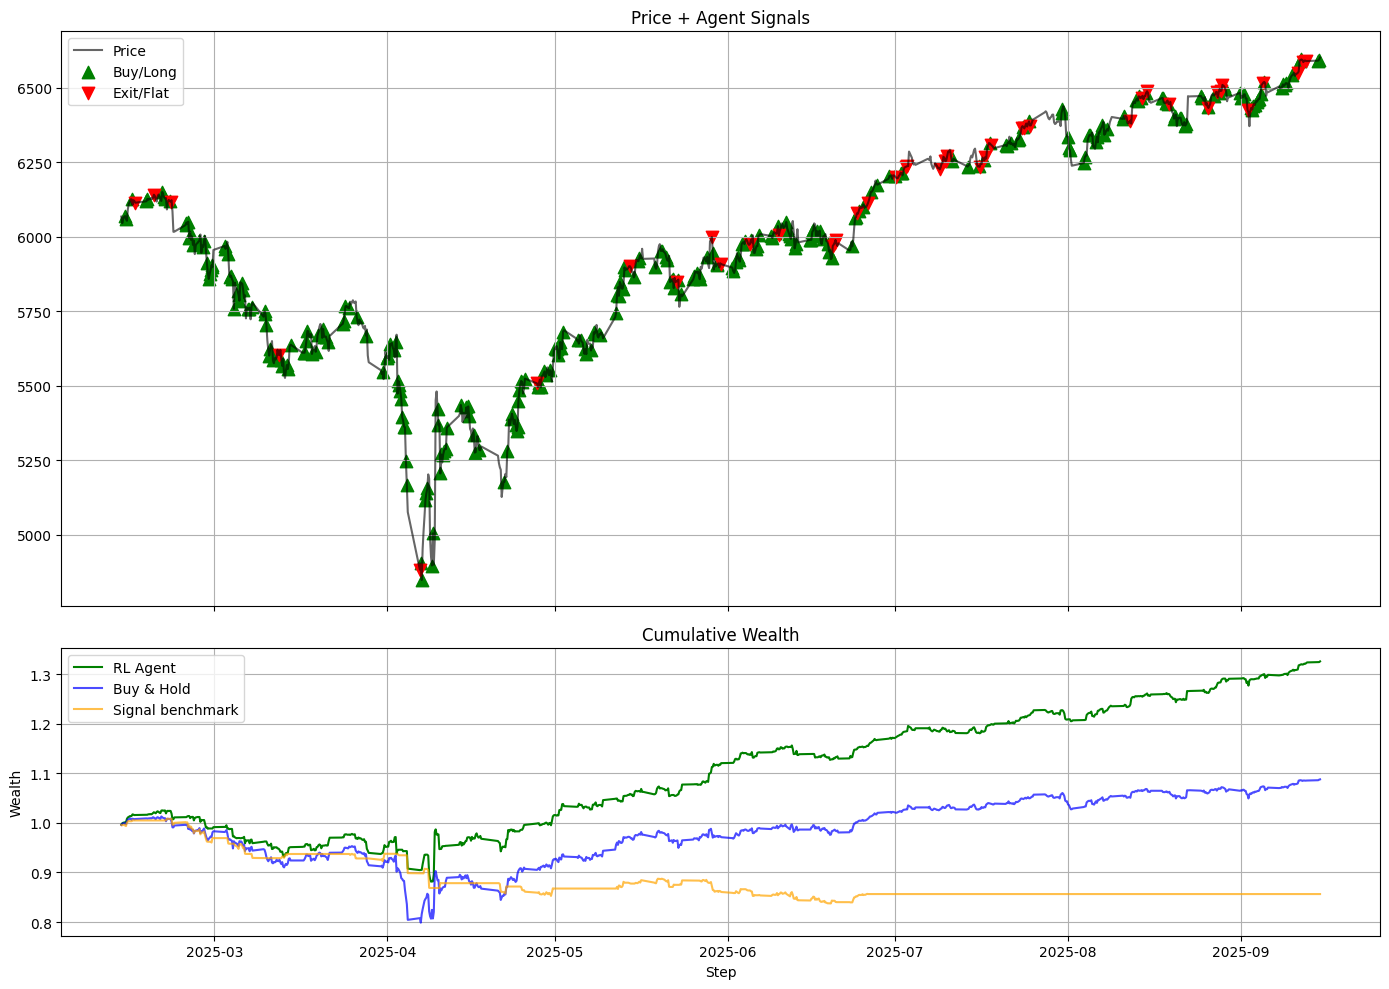

Agent stats: {'final_return': 0.32614958053524545, 'final_wealth': 1.3261495805352455, 'win_rate': 0.569593147751606, 'sharpe_ratio': 0.059911444275490874, 'return_to_risk': np.float64(64.65377030900767), 'avg_trade_duration': 3.541899441340782}
Results saved at: results\backtest_20250917_205803.npz
Plot saved at: results\backtest_plot_20250917_205803.png


In [54]:
backtester = BacktesterRL(model, env, transaction_cost=0.0005, output_dir="results")
res = backtester.run(X_test, nr_test,sig_test, t_test, p_test)

print("Agent stats:", res["agent"])
print("Results saved at:", res["saved_npz"])
print("Plot saved at:", res["plot"])
